In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [71]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [72]:
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [73]:
#Since we do not require the passenger id,ticket,name, we will drop down these columns
data.drop(columns = ['PassengerId','Name','Ticket'], axis=1, inplace =True)

In [74]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
#With the above observation it looks like there are some null values in the age columns let's found it out.

data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [76]:
#Lets fill out the na values of each column for that we will have to check the type of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [77]:
#filling na values of Age column with mean

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [78]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [79]:
#Dropping down the cabin column as the there are too many na values in it.

data.drop('Cabin', axis = 1, inplace =True)

In [80]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [81]:
#since the data is categorical we will fill it with mode.

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [82]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [83]:
#Let's see how skewed the features are

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [59]:
#Now will convert the sex into numberics of O for Male and 1 for female

In [86]:
data['Sex'] = data['Sex'].replace({"male":0,"female":1})

In [87]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [93]:
#Lets see the skewness in the data:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [96]:
#Lets check how the data will perform with skewness in it

In [97]:
#Convert the text of Embarked into numbers

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
data = data.astype('category')
data.dtypes

Survived    category
Pclass      category
Sex         category
Age         category
SibSp       category
Parch       category
Fare        category
Embarked    category
dtype: object

In [100]:
LE = LabelEncoder()

In [101]:
for column in data.columns:
    data[column] = LE.fit_transform(data[column])

In [102]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,0,28,1,0,18,2
1,1,0,1,52,1,0,207,0
2,1,2,1,34,0,0,41,2
3,1,0,1,48,1,0,189,2
4,0,2,0,48,0,0,43,2


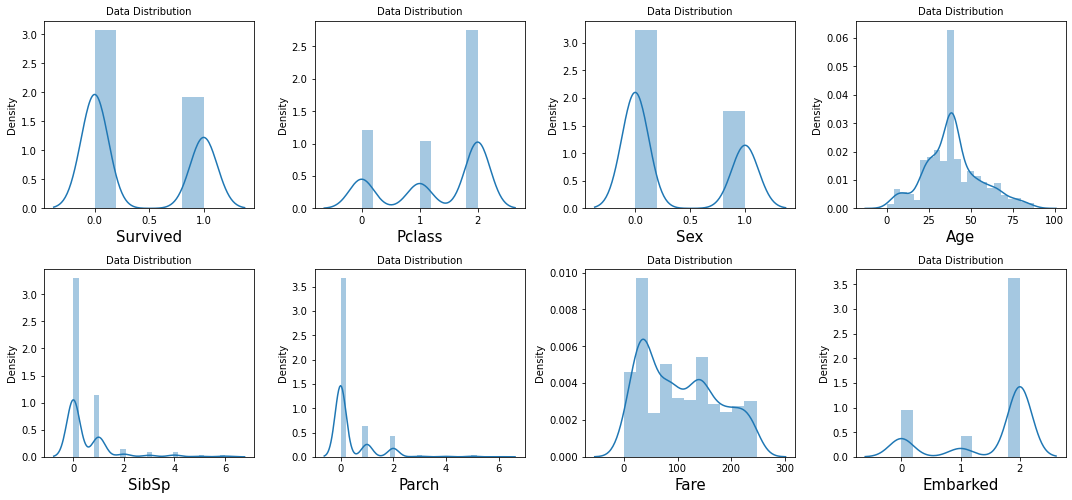

In [103]:
#Checking skewness in the data

plt.figure(figsize = [15,10])
plotnumber = 1

for column in data:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

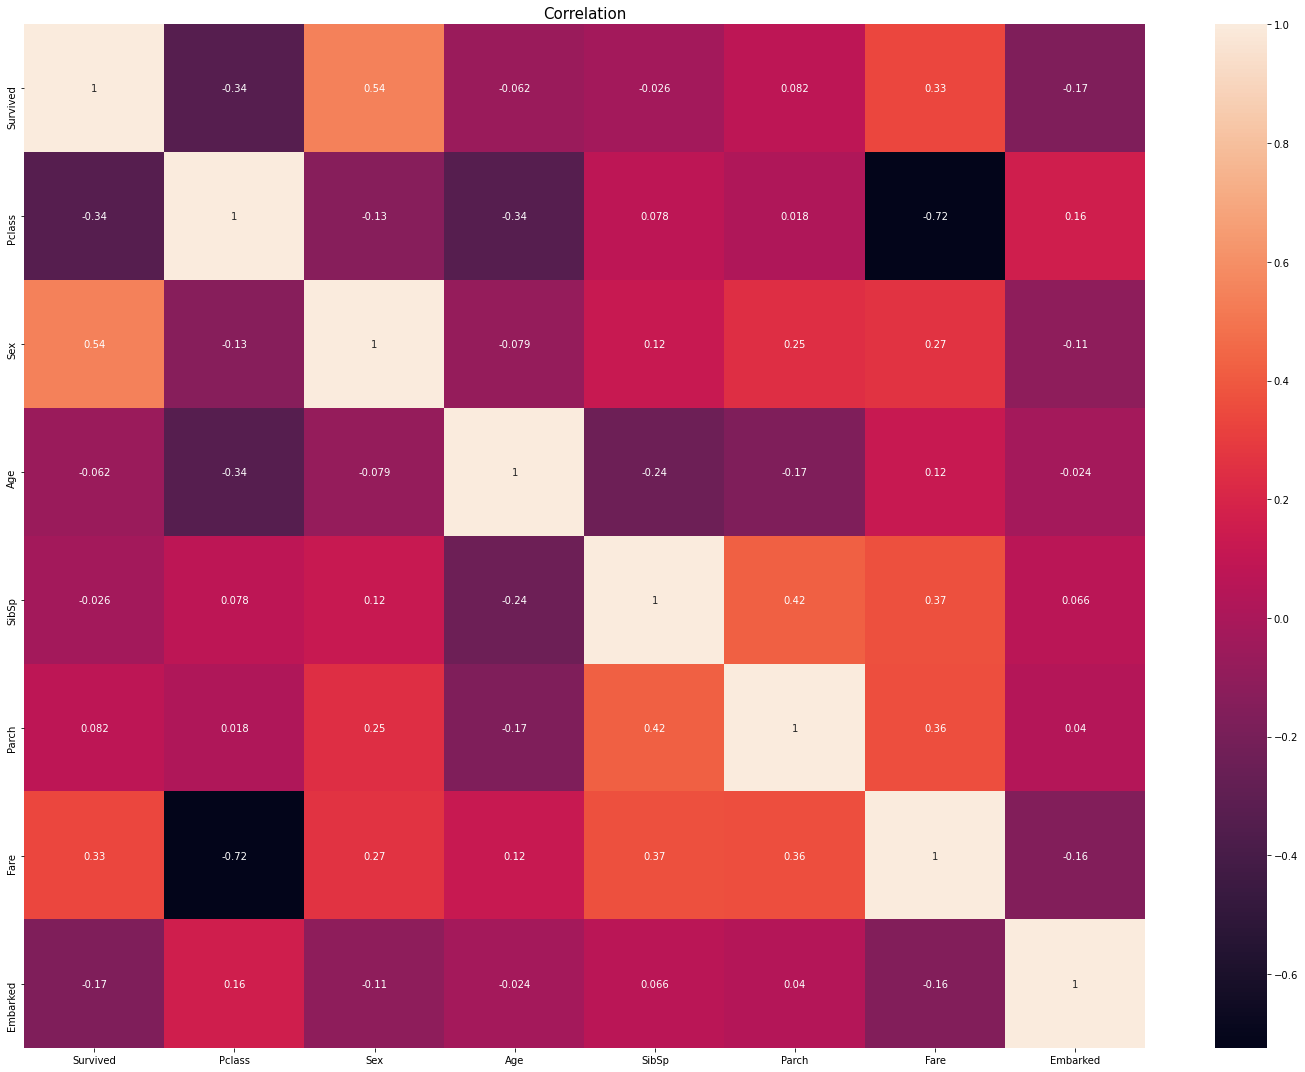

In [111]:
#Now will check the collinearity
corr_mat = data.corr()
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation', fontsize=15)
plt.tight_layout()

In [112]:
#With the above observation it looks like there is not much collinearity amount the features.

In [114]:
#Let's scale the data.
#Separating label and features

x = data.drop(['Survived'], axis = 1)
y = data['Survived']

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
from sklearn.metrics import confusion_matrix, classification_report

In [117]:
from sklearn.model_selection import train_test_split

In [32]:
#Scaling the data

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [120]:
#Splitting the data into train and test

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.75)

In [122]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [123]:
# Since there is some imbalance in the label we will balance it first.

In [124]:
from sklearn.utils import resample

In [125]:
#Concetenating the training data

X = pd.concat([x_train,y_train], axis =1)

In [126]:
not_survived = X[X.Survived == 0]
survived = X[X.Survived ==1]

In [128]:
#Upsampling good

upscale = resample(survived, replace =True, n_samples = len(not_survived), random_state = 25)

In [129]:
#Combining the upscaled data with the majority

upsampled = pd.concat([not_survived, upscale])

In [130]:
upsampled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
795,1,0,53,0,0,85,2,0
349,2,0,57,0,0,54,2,0
382,2,0,43,0,0,41,2,0
611,2,0,39,0,0,12,2,0
177,0,1,66,0,0,149,0,0


In [131]:
#Separating label and features

x = upsampled.drop(['Survived'], axis = 1)
y = upsampled['Survived']

In [132]:
x_scaled = scaler.fit_transform(x)

In [133]:
y.value_counts()

1    419
0    419
Name: Survived, dtype: int64

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 300)

In [135]:
#Model Building

In [62]:
## Lets see which model will give the best output

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [138]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

In [139]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [140]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
svc.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [141]:
#Lets check the roc_auc_score
#for Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.7450657894736843

In [142]:
#for Decision Tree
roc_auc_score(y_test,dt.predict(x_test))

0.858826754385965

In [143]:
#for Random Forest
roc_auc_score(y_test,rf.predict(x_test))

0.8752741228070176

In [144]:
#for KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.806469298245614

In [145]:
#For support vectore classifier
roc_auc_score(y_test,svc.predict(x_test))

0.8094846491228072

In [146]:
#Now plotting roc_auc_curve for all the columns

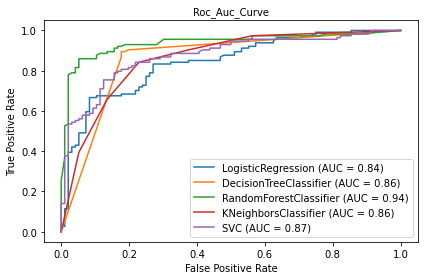

In [147]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(kn,x_test,y_test,ax=curve.ax_)

plot_roc_curve(svc,x_test,y_test,ax=curve.ax_)

plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

## With above plotting we can see that Random Forest will work best for this dataset.

In [148]:
RFC = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=40)

In [149]:
RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=40)

In [150]:
y_pred =RFC.predict(x_test)

In [151]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)
cr =classification_report(y_test,y_pred)

In [152]:
print("\nAccuracy Score ===>", accuracy)
print("\nConfusion Matrix===>\n",conf_mat)
print("\nROC_AUC_SCORE==>",roc)


Accuracy Score ===> 0.8714285714285714

Confusion Matrix===>
 [[ 82  14]
 [ 13 101]]

ROC_AUC_SCORE==> 0.8700657894736841


In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        96
           1       0.88      0.89      0.88       114

    accuracy                           0.87       210
   macro avg       0.87      0.87      0.87       210
weighted avg       0.87      0.87      0.87       210



In [154]:
# Hyperparameter tuning

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
params = {'n_estimators':[100,120,150],
         'criterion':['gini','entropy'],
         'max_depth':[18,21,23],
         'min_samples_leaf': [3,4,2],
         'min_samples_split': [8,11,13]}

In [157]:
clf = RandomForestClassifier()

In [158]:
grid = GridSearchCV(clf, param_grid= params, cv= 9, n_jobs=-1)

In [159]:
grid.fit(x_train,y_train)

GridSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 21, 23],
                         'min_samples_leaf': [3, 4, 2],
                         'min_samples_split': [8, 11, 13],
                         'n_estimators': [100, 120, 150]})

In [160]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 100}


In [161]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [162]:
clf

RandomForestClassifier(criterion='entropy', max_depth=23, min_samples_leaf=2,
                       min_samples_split=11)

In [163]:
#Training the model with above estimators

clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=23, min_samples_leaf=2,
                       min_samples_split=11)

In [164]:
y_pred = clf.predict(x_test)

In [165]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)
cr =classification_report(y_test,y_pred)

In [166]:
print("\nAccuracy Score ===>", accuracy)
print("\nConfusion Matrix===>\n",conf_mat)
print("\nROC_AUC_SCORE==>",roc)


Accuracy Score ===> 0.861904761904762

Confusion Matrix===>
 [[82 14]
 [15 99]]

ROC_AUC_SCORE==> 0.8612938596491229


In [167]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        96
           1       0.88      0.87      0.87       114

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.86      0.86      0.86       210



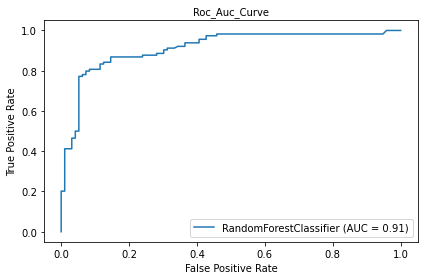

In [168]:
plot_roc_curve(clf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

In [169]:
#Saving the model

In [170]:
import joblib

In [171]:
filename = 'Titanic.sav'
joblib.dump(clf, filename)

['Titanic.sav']